# 数据总览

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('../data/BlackFriday.xlsx')
data.drop_duplicates(inplace=True)#去重
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  int64 
 3   Age                         537577 non-null  int64 
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  int64 
 6   Stay_In_Current_City_Years  537577 non-null  int64 
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 53.3+ MB
None


# 销售状况

In [3]:
print(data['Purchase'].sum())#总销售额
print(data.shape[0])#参与人次
print(data['Purchase'].mean())#人均消费
print(len(data['User_ID'].unique()))#参与人数
product_category=len(data['Product_ID'].unique())
print(product_category)#购买商品

5017668378
537577
9333.859852635065
5891
3623


# 消费者分析

<AxesSubplot:ylabel='User_ID'>

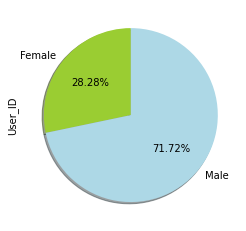

In [8]:
colors=['yellowgreen','lightblue']
data.drop_duplicates('User_ID').groupby('Gender')['User_ID'].count().plot(kind='pie',labels=['Female','Male'],autopct='%3.2f%%',colors=colors,shadow=True,startangle=90)
#用户性别

<AxesSubplot:ylabel='Purchase'>

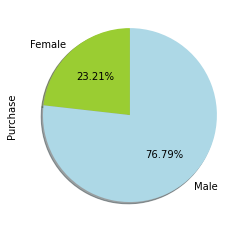

In [5]:
data.groupby('Gender')['Purchase'].sum().plot(kind='pie',labels=['Female','Male'],autopct='%3.2f%%',colors=colors,shadow=True,startangle=90)
#男女占总消费额的比例

Age
0     218
1    1069
2    2053
3    1167
4     531
5     481
6     372
Name: User_ID, dtype: int64
2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64


Text(0, 0.5, 'Number of people')

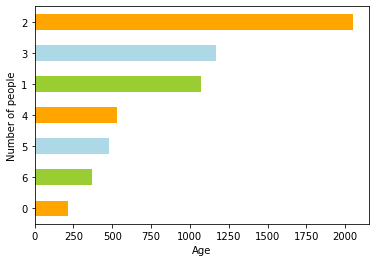

In [9]:
print(data.drop_duplicates('User_ID').groupby('Age')['User_ID'].count())
#用户年龄分析，年龄0-17，18-25，26-35，36-45，46-50，51-55，55+分别用0~6替换
data.drop_duplicates('User_ID').groupby('Age')['User_ID'].count().sort_values().plot(kind='barh',color=['orange','yellowgreen','lightblue'])
print(data['Age'].value_counts())
plt.xlabel('Age')
plt.ylabel('Number of people')

Text(0, 0.5, 'Age')

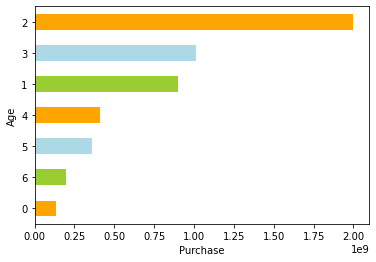

In [10]:
data.groupby('Age')['Purchase'].sum().sort_values().plot(kind='barh',color=['orange','yellowgreen','lightblue'])
plt.xlabel('Purchase')
plt.ylabel('Age')
#不同年龄对于此次购物节的消费贡献

Text(0, 0.5, 'Number of people')

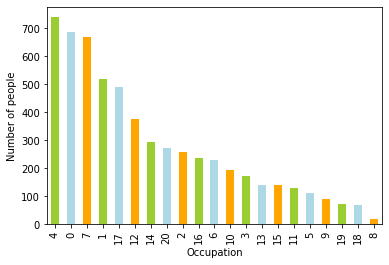

In [11]:
user_occupation=data.drop_duplicates('User_ID').groupby('Occupation')['User_ID'].count()
data.drop_duplicates('User_ID').groupby('Occupation')['User_ID'].count().sort_values(ascending=False).plot(kind='bar',color=['yellowgreen','lightblue', 'orange'])
plt.xlabel('Occupation')
plt.ylabel('Number of people')
#不同职业的参与度

Text(0, 0.5, 'Occupation')

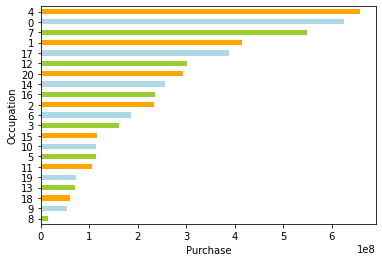

In [13]:
data.groupby('Occupation')['Purchase'].sum().sort_values(ascending=True).plot(kind='barh',color=['yellowgreen','lightblue', 'orange'])
plt.xlabel('Purchase')
plt.ylabel('Occupation')
#不同职业的贡献度

<AxesSubplot:ylabel='User_ID'>

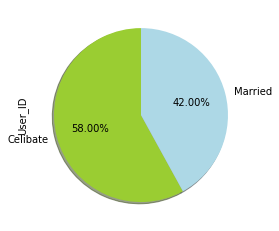

In [14]:
data.drop_duplicates('User_ID').groupby('Marital_Status')['User_ID'].count().plot(kind='pie',labels=['Celibate','Married'],autopct='%3.2f%%',colors=colors,shadow=True,startangle=90)
#婚姻状况

Text(0, 0.5, 'Purchase')

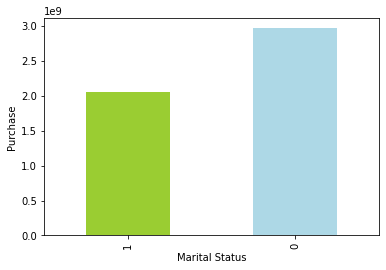

In [17]:
data.groupby('Marital_Status')['Purchase'].sum().sort_values(ascending=True).plot(kind='bar',color=colors)
plt.xlabel('Marital Status')
plt.ylabel('Purchase')
#婚姻状况与消费金额

Text(0, 0.5, 'Number of people')

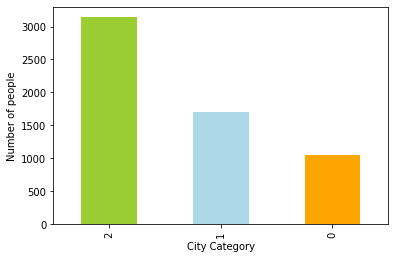

In [19]:
data.drop_duplicates('User_ID').groupby('City_Category')['User_ID'].count().sort_values(ascending=False).plot(kind='bar',color=['yellowgreen','lightblue', 'orange'])
plt.xlabel('City Category')
plt.ylabel('Number of people')
#城市，用0~2替换A\B\C

<AxesSubplot:ylabel='Purchase'>

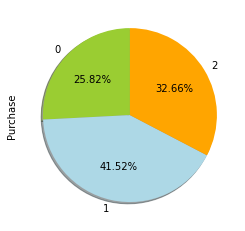

In [25]:
data.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct='%3.2f%%',colors=['yellowgreen','lightblue', 'orange'],shadow=True,startangle=90)
#城市的贡献度

City_Category
0    8958.011014
1    9198.657848
2    9844.441855
dtype: float64


Text(0, 0.5, 'Consumption per capita')

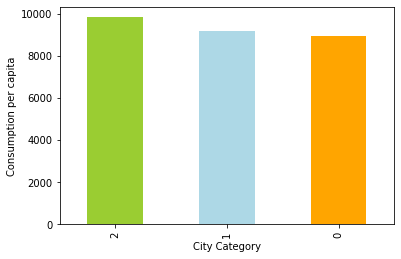

In [28]:
a=data.groupby('City_Category')['Purchase'].sum()
b=data.groupby('City_Category')['User_ID'].count()
c=a/b
print(c)
c.sort_values(ascending=False).plot(kind='bar',color=['yellowgreen','lightblue', 'orange'])
plt.xlabel('City Category')
plt.ylabel('Consumption per capita')
#人均消费

Text(0, 0.5, 'Number of people')

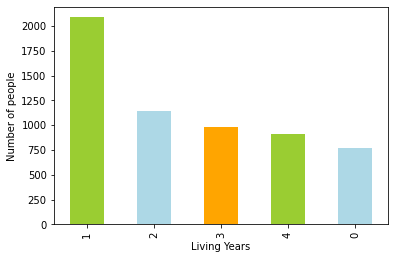

In [29]:
data.drop_duplicates('User_ID').groupby('Stay_In_Current_City_Years')['User_ID'].count().sort_values(ascending=False).plot(kind='bar',color=['yellowgreen','lightblue', 'orange'])
plt.xlabel('Living Years')
plt.ylabel('Number of people')
#居住时间

<AxesSubplot:ylabel='Purchase'>

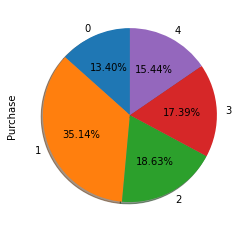

In [33]:
data.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='pie',autopct='%3.2f%%',shadow=True,startangle=90)
#居住时间贡献度

# 商品分析

Text(0, 0.5, 'Product')

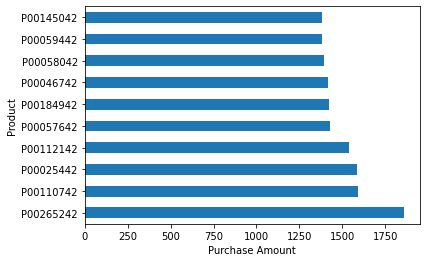

In [36]:
data['Product_ID'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel('Purchase Amount')
plt.ylabel('Product')
#不同产品销量

IndexError: index 0 is out of bounds for axis 0 with size 0

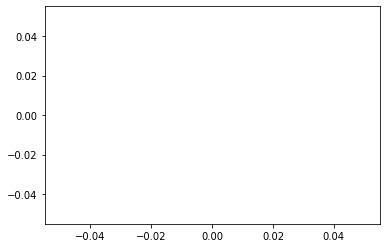

In [46]:
data[data['Gender']=='0']['Product_ID'].value_counts()[:10].plot(kind='barh',color=['yellowgreen'])

In [47]:
f=data[data['Gender']=='0']['Product_ID'].value_counts()[:10]
m=data[data['Gender']=='1']['Product_ID'].value_counts()[:10]
comm=[]
for i in f.index:
    if i in m.index:
        comm.append(i)
print(comm)
#男女都比较青睐的商品

[]


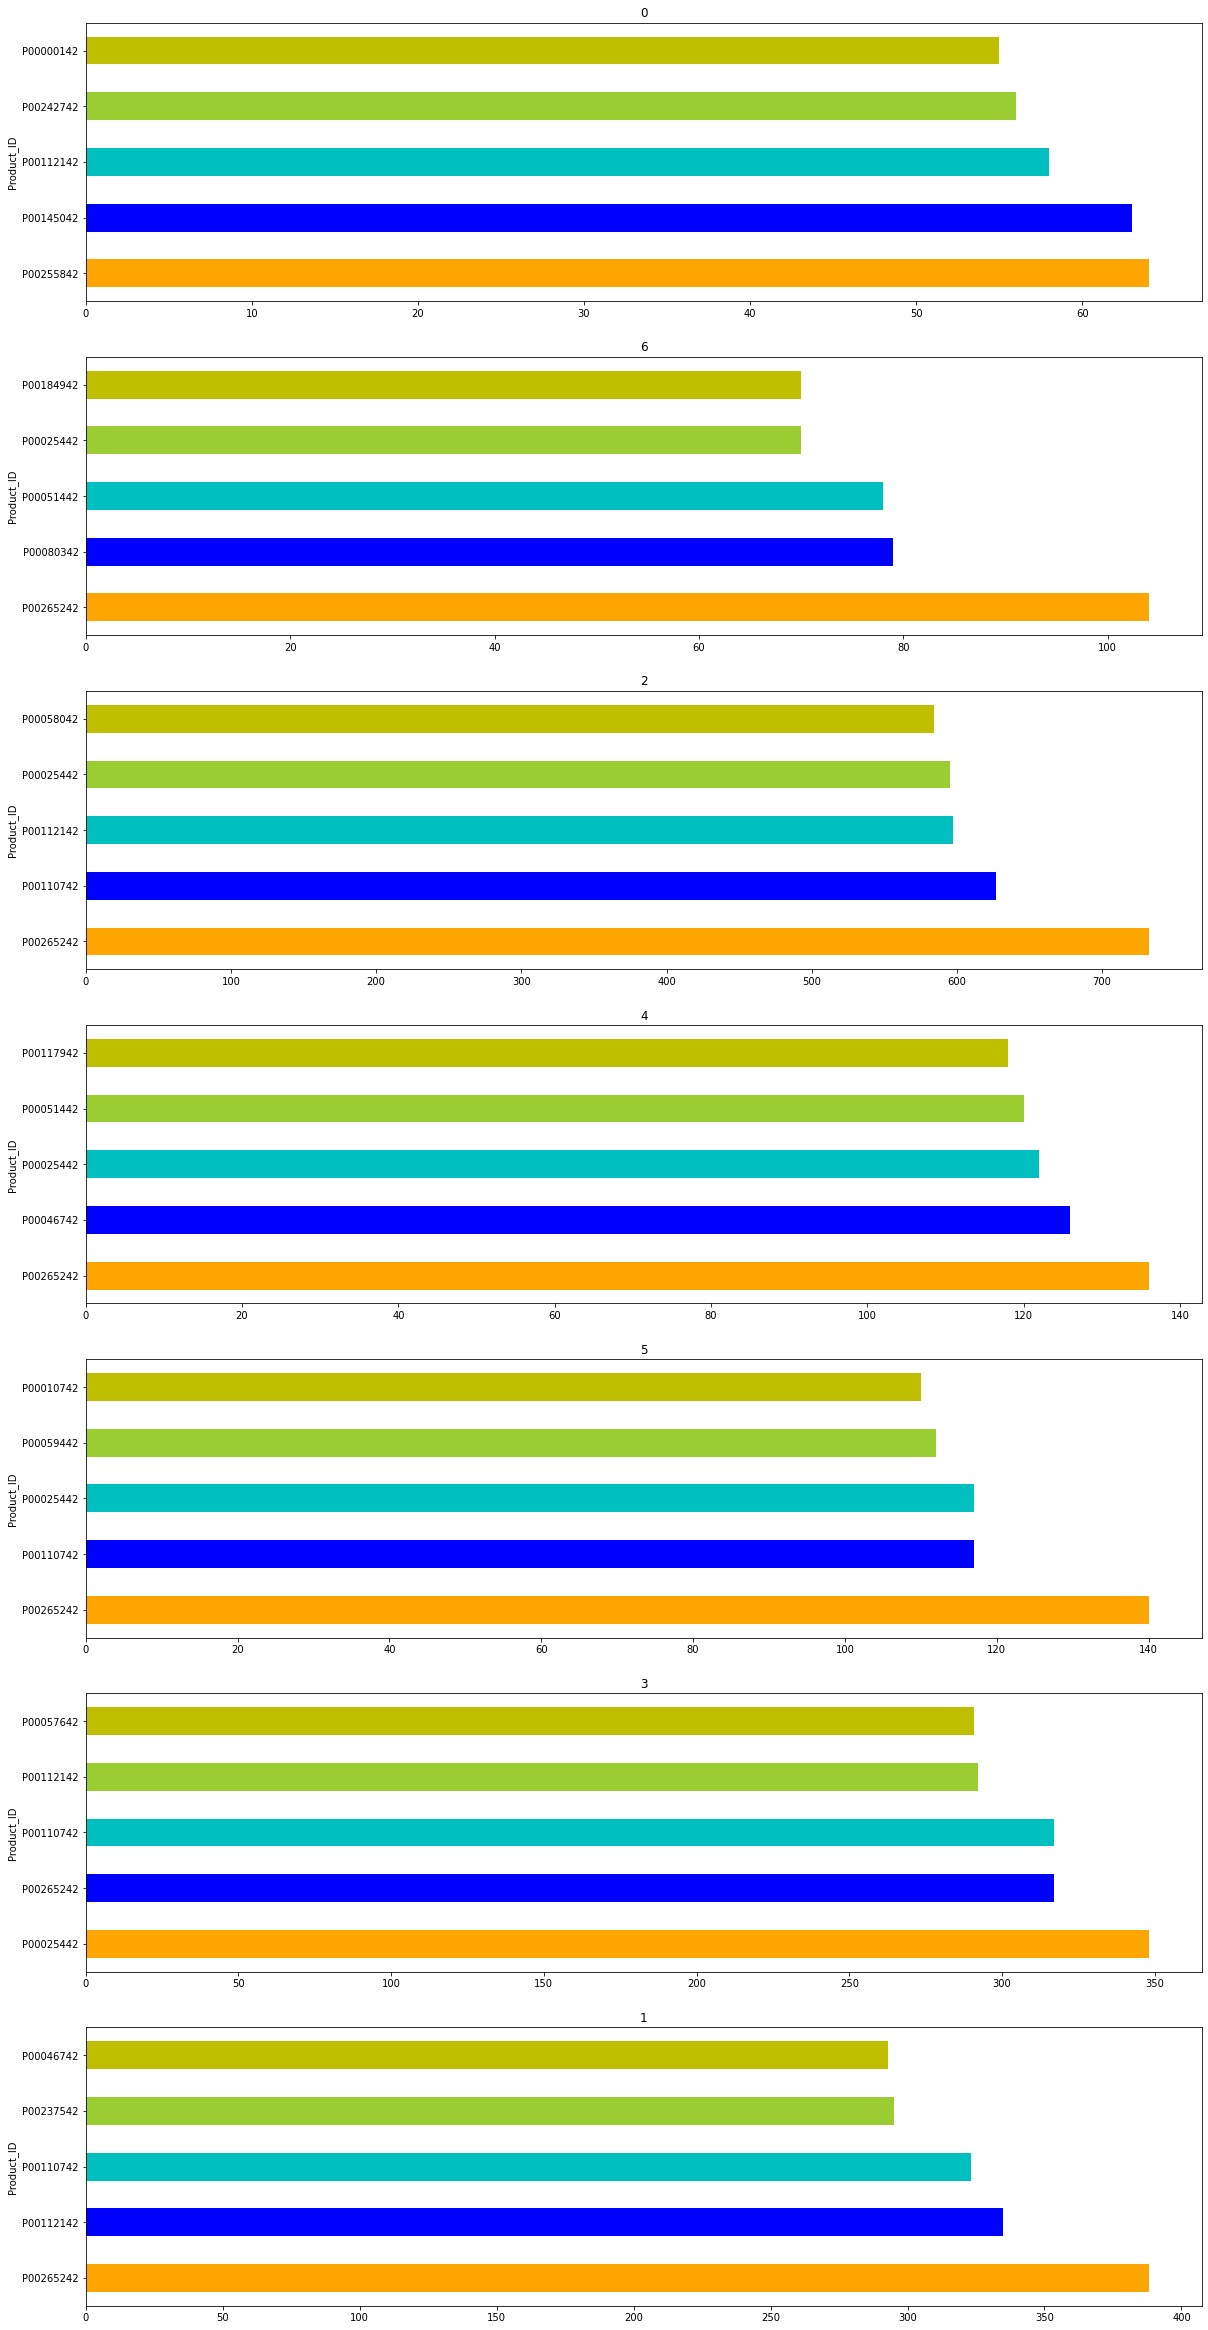

In [49]:
plt.figure(figsize=(20,7*6))
age_value=data['Age'].unique()
count=0
for i in age_value:
    count+=1
    ax = plt.subplot(7,1,count)
    data.groupby('Age')['Product_ID'].value_counts().loc[i].sort_values(ascending=False)[:5].plot(kind='barh',color=['orange','b', 'c', 'yellowgreen', 'y'])
    plt.title(i)
#不同年龄喜欢的商品

Text(0.5, 1.0, 'Celibate')

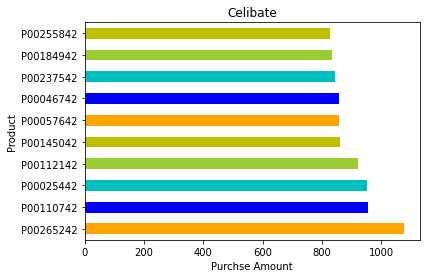

In [50]:
data[data['Marital_Status']==0]['Product_ID'].value_counts()[:10].plot(kind='barh',color=['orange','b', 'c', 'yellowgreen', 'y'])
plt.xlabel('Purchse Amount')
plt.ylabel('Product')
plt.title('Celibate')

Text(0.5, 1.0, 'Married')

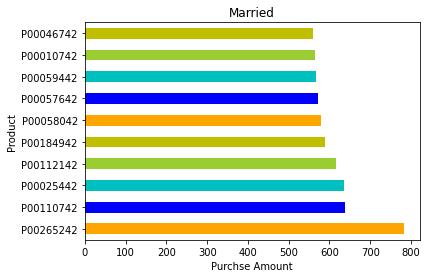

In [52]:
data[data['Marital_Status']==1]['Product_ID'].value_counts()[:10].plot(kind='barh',color=['orange','b', 'c', 'yellowgreen', 'y'])
plt.xlabel('Purchse Amount')
plt.ylabel('Product')
plt.title('Married')

Suggestion:

1. In this event, the best-selling product is P00265242, followed by P00110742, P00025442. You can use the most popular items to display in the most important positions to attract traffic to other products, and increase the inventory of best-selling products to prevent out of stock.

2. For buyers of different ages and genders, the favored products are different. In view of this feature, we should conduct reasonable drainage and set up special areas for different ages and genders. Especially for young people, the main force of consumption.

3. For city C, it is necessary to deal with the possible peak passenger flow, and corresponding measures can be taken in advance to deal with it. In the next shopping festival, large-scale promotional activities can be planned for city C to tap its consumption potential to increase sales.

4. Cities A and C have strong spending power. Therefore, the platform needs to maintain these key customers in a targeted manner, and can appropriately add some mid-to-high-end products to meet their needs, so as to tap their shopping potential.